In [79]:
# Investigate a project
import pandas as pd
import numpy as np
# magic word below: "matplotlib inline "  :-)
%matplotlib inline
import matplotlib.pyplot as plt
import csv


In [80]:
# DataSet used: TMDB movie data (https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv&sa=D&ust=1535239413276000)

# Questions to be analyzed:
#1) Year profitability comparision.- this will identify the year we have maximum and least profitability
# 2) Run time (Average) of the movies
#3) Highest gross(Revenue) movie vs lowest
#4) Highest Budget vs lowest
#5) Plotting runtime of movies

#Documentation of any data wrangling:
 #Dataset Obsevations and initial cleansing:
#  Assuming columns (budget,revenue, budject_adj and revenue_adj) are dollar amounts, as unit of measurement is missing, I'm treating them as $$$$ amount
# Remove unused columns such as id, imdb_id, vote_count, production_company, keywords, homepage etc.
# remove data that appears duplciate or have zero budget.
# column data type formatting , ex: release date as time stamp.
# Changing format of budget and revenue column.

#Methodologies used: Below code has self explanatory comments to walk through the process of analyzing the data

tmdb_df = pd.read_csv("tmdb-movies.csv")
tmdb_df.head() # view first 5 records in the file
# print(tmdb_df.head(5)) # view first 5 records in the file
# print(tmdb_df.columns) # view list of columns that will help us determine key columns for later analysis of data.

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [81]:
# Get total record counts.
rec, columns = tmdb_df.shape
print("*"*40,"\n")
print("Number of rows :" ,rec)
print("Number of columns :", columns,"\n")
print("*"*40,"\n")
#Remove duplicate rows (http://pandas.pydata.org/pandas-docs/version/0.17/generated/pandas.DataFrame.drop_duplicates.html)
tmdb_df.drop_duplicates(keep ='first', inplace=True)
rec_d, col_d =  tmdb_df.shape
print("Number of rows after duplciates are removed:" ,rec_d)
print("------Total Number of duplicate rows:" ,abs(rec-rec_d))
print("*"*40,"\n")

**************************************** 

Number of rows : 10866
Number of columns : 21 

**************************************** 

Number of rows after duplciates are removed: 10865
------Total Number of duplicate rows: 1
**************************************** 



In [7]:
#Remove unused/not required columns as they dont provide any value. 
col_del=[ 'id', 'imdb_id', 'budget_adj', 'revenue_adj', 'homepage']

#deleting columns in the above col_del list[] #(http://pandas.pydata.org/pandas-docs/version/0.17/generated/pandas.DataFrame.drop.html)
tmdb_df= tmdb_df.drop(col_del,1)

#Dataset after removing unused columns
#print(tmdb_df.head())
rec_c, col_c =  tmdb_df.shape
print("Number of columns :", col_c,"\n")
print("------Total Number of columns REMOVED:" ,abs(col_c-columns))
print("*"*40,"\n")
tmdb_df.head()

Number of columns : 16 

------Total Number of columns REMOVED: 5
**************************************** 



,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [82]:
#removed rows where revenue or budget == 0
tmdb_df = tmdb_df[tmdb_df['budget']!=0]
tmdb_df = tmdb_df[tmdb_df['revenue']!=0]
tmdb_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [83]:
# column data type formatting , ex: release date as time stamp.
tmdb_df.release_date = pd.to_datetime(tmdb_df['release_date'])
print(tmdb_df.dtypes)

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object


In [84]:
# add column to that has profit margin  #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.insert.html
tmdb_df.insert(4, 'profit', tmdb_df['revenue']-tmdb_df['budget']) 
#preview Data
tmdb_df.head(1)

,id,imdb_id,popularity,budget,profit,revenue,original_title,cast,homepage,director,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1363528810,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


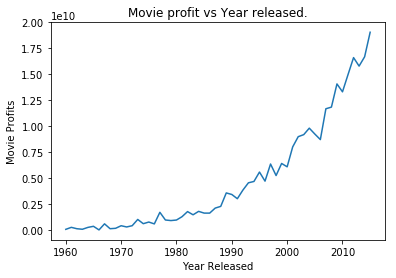

In [27]:
############################ DATA EXPLORATION ################################

#1) Year profitability comparision.- this will identify the year we have maximum and least profitability
profits_yr = tmdb_df.groupby('release_year')['profit'].sum()

plt.xlabel('Year Released') # X-axis
plt.ylabel('Movie Profits') # Y-axis
plt.title('Movie profit vs Year released.') # Plot title
plt.plot(profits_yr) #--Plot the data
plt.show() # display the plot

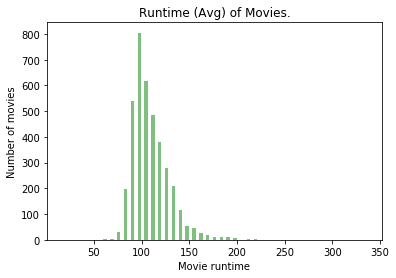

In [33]:
# 2) Run time (Average) of the movies
plt.xlabel('Movie runtime') # X-axis
plt.ylabel('Number of movies') # Y-axis
plt.title('Runtime (Avg) of Movies.') # Plot title
plt.hist(tmdb_df['runtime'], rwidth = 0.5,bins =45, facecolor='green', alpha=0.5)
plt.show()

In [85]:
#Funcitons to use later to calculate aggregates,  max, min and Average 
def measure_max(column):
    max = tmdb_df[tmdb_df[column]==tmdb_df[column].max()]
    return  max

def measure_min(column):
    min = tmdb_df[tmdb_df[column]==tmdb_df[column].min()]
    return  min

def measure_avg(column):
    return tmdb_df[column].mean()



In [86]:
# 3) Highest profit
measure_max('profit')

,id,imdb_id,popularity,budget,profit,revenue,original_title,cast,homepage,director,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,tt0499549,9.432768,237000000,2544505847,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,...,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09


In [87]:
#lowest Profit
measure_min('profit')

,id,imdb_id,popularity,budget,profit,revenue,original_title,cast,homepage,director,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,46528,tt1032751,0.25054,425000000,-413912431,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,http://www.iamrogue.com/thewarriorsway,Sngmoo Lee,...,An Asian assassin (Dong-gun Jang) is forced to...,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010,425000000.0,11087569.0


In [88]:
#4) #highest Budget Movie
measure_max('budget')

,id,imdb_id,popularity,budget,profit,revenue,original_title,cast,homepage,director,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,46528,tt1032751,0.25054,425000000,-413912431,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,http://www.iamrogue.com/thewarriorsway,Sngmoo Lee,...,An Asian assassin (Dong-gun Jang) is forced to...,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010,425000000.0,11087569.0


In [56]:
#lowest Budget
measure_min('budget')

,popularity,budget,revenue,original_title,profit,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
2618,0.090186,1,100,Lost & Found,99,David Spade|Sophie Marceau|Ever Carradine|Step...,Jeff Pollack,A comedy about a guy who would do anything to ...,restaurant|neighbor|dog|ring,A comedy about finding your true love at any p...,95,Comedy|Romance,Alcon Entertainment|Dinamo Entertainment,1999-04-23,14,4.8,1999
3581,0.520430,1,1378,"Love, Wedding, Marriage",1377,Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...,Dermot Mulroney,Here comes the ride.,wedding vows|marriage|love,A happy newlywed marriage counselor's views on...,90,Comedy|Romance,120dB Films|Scion Films|Voodoo Production Serv...,2011-06-03,55,5.3,2011


In [89]:
#Highest Revene
measure_max('revenue')

,id,imdb_id,popularity,budget,profit,revenue,original_title,cast,homepage,director,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,tt0499549,9.432768,237000000,2544505847,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,...,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09


In [90]:
#Lowest Revene
measure_min('revenue')

,id,imdb_id,popularity,budget,profit,revenue,original_title,cast,homepage,director,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
5067,13537,tt0323944,0.462609,6000000,-5999998,2,Shattered Glass,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...,NaN,Billy Ray,...,Fact-based 2003 drama about the young journali...,94,Drama|History,Lions Gate Films|Cruise/Wagner Productions|Bau...,2003-11-14,46,6.4,2003,7.112116e+06,2.370705
8142,2293,tt0113749,0.552091,6000000,-5999998,2,Mallrats,Jason Lee|Jeremy London|Shannen Doherty|Claire...,NaN,Kevin Smith,...,"Both dumped by their girlfriends, two best fri...",94,Romance|Comedy,Gramercy Pictures|Alphaville Films|View Askew ...,1995-10-20,201,6.8,1995,8.585801e+06,2.861934


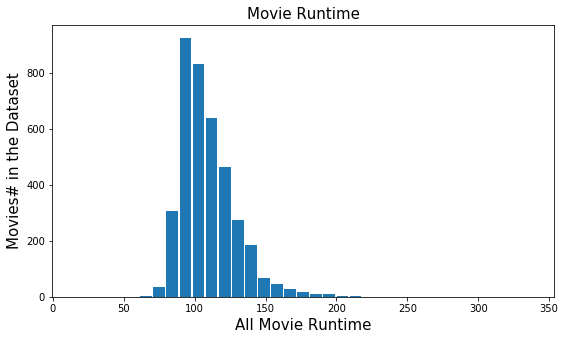

In [91]:
#5) #plotting a histogram of runtime of movies
def avg_fun(column):
    return tmdb_df[column].mean()
#giving the figure size(width, height)
plt.figure(figsize=(9,5))
plt.xlabel('All Movie Runtime', fontsize = 15)
plt.ylabel('Movies# in the Dataset', fontsize=15)
plt.title('Movie Runtime', fontsize=15)
plt.hist(tmdb_df['runtime'], rwidth = 0.9, bins =35)
plt.show()

In [94]:
print("-"*40)

----------------------------------------


In [97]:
#Conclusions
# So far it seems interesting to analyze the data using various concepts of Numpy, Pandas and visualize using Matplotlib.
#Facts are visible in the above analysis and plots.

#Based on the highest and lowest budgests measures, Average Budget must be ~ 60 M dollar
#Average duration of the movie must be 113 minutes
#Note: There are several ways of analyze this data and no limit to the conclusion to be drafted and is purely based on use case.
    